In [27]:
# import libraries 
import os
import numpy as np
import pandas as pd
import sklearn as scikit_learn
import re 
# importing libraries for text processing 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
nltk.download('punkt')
nltk.download('stopwords') 
import matplotlib.pyplot as plt


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/solougbane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/solougbane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/solougbane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def wordcleaner(text):
    #Remove special characters, punctuations and numbers 
    text = re.sub(r'[^a-zA-Z\s]','',text)
    
    # turn text to lowercase
    text = text.lower()
    
    #Tokenize text
    tokens = word_tokenize(text)
    
    #Remove stopwords
    #stop_words = set(stopwords.words('english'))
    #tokens = [token for token in tokens if token not in stop_words]
    
    # lemmatize test 
    #lemmatizer = WordNetLemmatizer()
    #lemwords = [lemmatizer.lemmatize(token) for token in tokens]
    
    #Join tokens back in single string 
    processed_text = ' '.join(tokens)
    return processed_text 

In [62]:
#Write spam training files into training dataframe 
spamtrain_directory = '/Users/solougbane/Desktop/Project_1/emails/spamtraining'

kspamdata = []

for filename in os.listdir(spamtrain_directory):
    if filename.endswith('.txt'):
        # read file contents 
        with open(os.path.join(spamtrain_directory, filename), 'r',errors = 'ignore') as file:
            spamcontent = file.read()
            #Pre-process the text 
            processed_text = wordcleaner(spamcontent)
            # add processed text to list 
            kspamdata.append(processed_text)
            
#Write ham training files into training dataframe
hamtrain_directory = '/Users/solougbane/Desktop/Project_1/emails/hamtraining'
for filename in os.listdir(hamtrain_directory):
    if filename.endswith('.txt'):
        # read file contents 
        with open(os.path.join(hamtrain_directory, filename), 'r') as file:
            hamcontent = file.read()
            #Pre-process the ham text 
            processed_text = wordcleaner(hamcontent)
            #add processed ham text to list 
            kspamdata.append(processed_text)

ktrain_df = pd.DataFrame(kspamdata)


In [63]:
ktrain_df.info()
ktrain_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


(200, 1)

In [64]:
#print(processed_text)
type(processed_text)
ktrain_df.head(2)

,0
0,subject quick way to buy soft ware variety of ...
1,subject heisser fetish mann war das ein wochen...


In [86]:
#Import testing data 
spamtest_directory = '/Users/solougbane/Desktop/Project_1/emails/spamtesting'

kspamtest = []

for filename in os.listdir(spamtest_directory):
    if filename.endswith('.txt'):
        # read spam testing files 
        with open(os.path.join(spamtest_directory, filename), 'r',errors = 'ignore') as file:
            spamtest_content = file.read()
            # pre-process the spam testing data
            processed_text = wordcleaner(spamtest_content)
            # add spam testing to list 
            kspamtest.append(processed_text)

hamtest_directory = '/Users/solougbane/Desktop/Project_1/emails/hamtesting'
for filename in os.listdir(hamtest_directory):
    if filename.endswith('.txt'):
        # read ham testing files 
        with open(os.path.join(hamtest_directory, filename), 'r') as file:
            hamtest_content = file.read()
            # pre-processing the ham testing data
            processed_text = wordcleaner(hamtest_content)
            # add ham testing data to list 
            kspamtest.append(processed_text)

ktest_df = pd.DataFrame(kspamtest)

In [50]:
ktest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  200 non-null    object
 1   spam     200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [71]:
type(kspamdata)
#print(kspamdata)

list

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(max_features = 1000)
X = vectorizer.fit_transform(kspamdata)

In [78]:
print(X.shape)

(200, 1000)


In [85]:
#print(X)

In [80]:
# train the model
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X)

/Users/solougbane/Desktop/Project_1/env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [81]:
from sklearn.metrics import silhouette_score
s_score = silhouette_score(X,kmeans.labels_)
print("score: ",s_score)

score:  0.05468493278731529


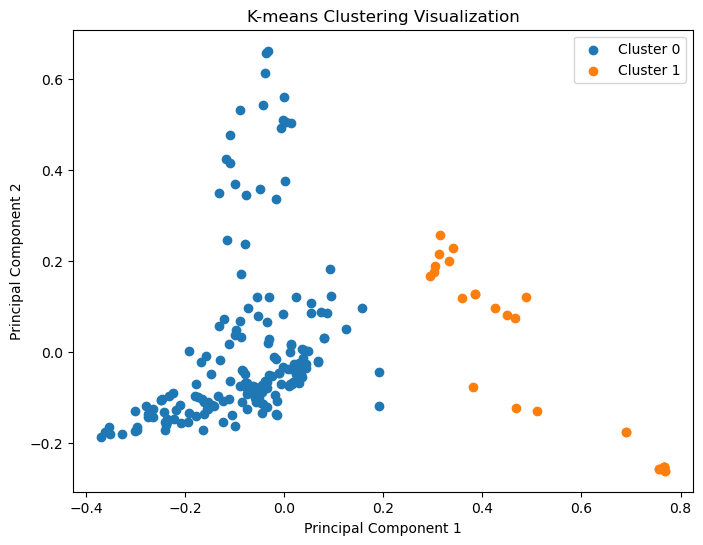

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
plt.figure(figsize=(8,6))

for i in range(2):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.title('K-means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [87]:
test_email = vectorizer.transform(kspamtest)
email_predict = kmeans.predict(test_email)
print("predicted: ", email_predict)

predicted:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


In [100]:
print(kspamtest)

['subject your pharmacy ta would you want cheap perscriptions http www prlce com', 'subject so it s me varenukha sorry for taking so long i finally found that site you were asking me about remember the one that i used to get a great r ate on my homel o an i was just looking around the other day and they offerr a te s at only i am sure they can help you out this link please let me know how it goes talk to you soon don wade afgkietc hbfgyhf ecczvkwi ngiokj hmawvlpr xqxpqrwm vwptk jhfjahe bpqvs merudtacj orlwn amxlud vumfjybnv pzhktfgl gfwcopde iqitftvig lxpsm vlpmveb ctzqxbzv xfirwlfs wvxxsm faapk eijqpud tjkecef vybtxve etail ptasmgt bddnwsfi kdxekgt xjwasc ylsxlcuc msnqaj hdipxv wzvybmze ppksvk grmzde mirbgklv oinrgxug nhnbtceru wijxhp qkmcvn veccyv jmrnym haujvzx qtyowa olznzx yrmnwavl kyyeasy ymmdzvpfr qboryfkdh shtgxnh pzgiowsa xtghlwbcl fonbrsi lbdib yznni gaznxgu uycyruiq xvpwlq skiayvb fgphkvkd lgdxgcf txceqsirr pqmfdqfri fuwltjtch qzoup ihidtmny uhcneikcn ydraenp ixljd vcwnh fhd

  (0, 998)	0.2358998207905617
  (0, 996)	0.18780019325739392
  (0, 990)	0.3744394083320672
  (0, 988)	0.3689160344797617
  (0, 946)	0.3802461533152354
  (0, 822)	0.11320670767010832
  (0, 373)	0.33634849420178203
  (0, 147)	0.28263666840400753
  (0, 130)	0.5313772288160863
  (1, 996)	0.20594571957090155
  (1, 961)	0.14877751623143037
  (1, 947)	0.10923689084908735
  (1, 921)	0.1616122341140586
  (1, 886)	0.1169408393025783
  (1, 871)	0.07699688934741794
  (1, 866)	0.2737455237118582
  (1, 860)	0.12476681671335355
  (1, 859)	0.1774793603434544
  (1, 839)	0.1616122341140586
  (1, 829)	0.16555632513921464
  (1, 822)	0.0413816345038208
  (1, 796)	0.16555632513921464
  (1, 795)	0.16991631548930086
  (1, 786)	0.2184737816981747
  (1, 782)	0.16555632513921464
  :	:
  (199, 481)	0.07625911850524004
  (199, 452)	0.06302015178361892
  (199, 438)	0.059535111951823684
  (199, 429)	0.16971891637771885
  (199, 414)	0.03921832780220266
  (199, 387)	0.04022856861351899
  (199, 338)	0.04184030929874634

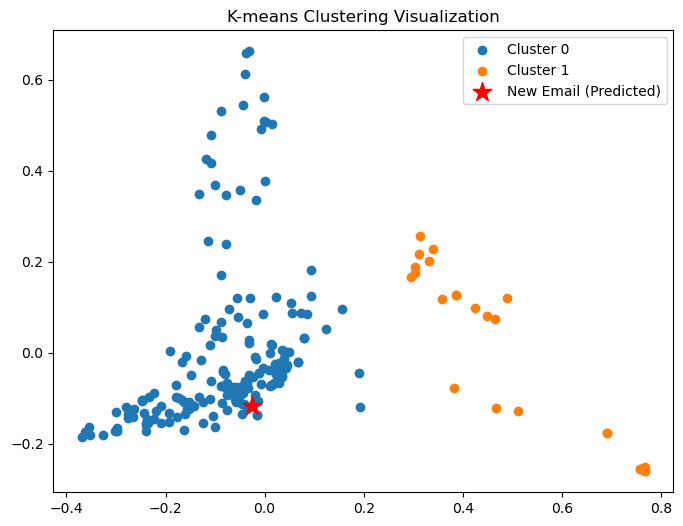

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
#print(X_pca)
plt.figure(figsize=(8,6))

X_test = vectorizer.transform(kspamtest)
X_test_pca = pca.transform(X_test.toarray())
print(X_test)
#print("xtestpca: ",X_test_pca)
for i in range(2):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')

predicted_cluster = kmeans.predict(X_test)
plt.scatter(X_test_pca[0, 0], X_test_pca[0, 1], color='red', marker='*', s=200, label='New Email (Predicted)')

plt.title('K-means Clustering Visualization')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
plt.legend()
plt.show()